# This notebook will display any NEXRAD site Reflectivity file from the Level II data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyart

import os
import cartopy.crs as ccrs



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/satdat/python/satx/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/satdat/python/satx/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
dadash='-------------------------------------'
print(dadash+dadash)

--------------------------------------------------------------------------


In [3]:
list_of_lats = np.arange(0.0,90.0,1.0)
#
list_of_lons =np.arange(-179.0,181.0,1.0)

In [6]:
ALL_call_signs= \
["PGUA","RKSG","RKJK","RODN","KABR","KENX","KABX","KFDR","KAMA","PAHG", \
"KEWX","KBBX","PABC","KBLX","KBGM","KBMX","KBIS","KCBX","KBOX","KBRO", \
"KBUF","KCXX","KFDX","KICX","KCLX","KRLX","KCYS","KLOT","KILN","KCLE", \
"KCAE","KGWX","KCRP","KFWS","KDVN","KFTG","KDMX","KDTX","KDDC","KDOX", \
"KDLH","KDYX","KEYX","KEVX","KEPZ","KLRX","KBHX","PAPD","KFSX","KHPX", \
"KGRK","KPOE","KEOX","KSRX","KIWX","KAPX","KGGW","KGLD","KMVX","KGJX", \
"KGRR","KTFX","KGRB","KGSP","KRMX","KUEX","KHDX","KCBW","KHGX","KHTX", \
"KIND","KJKL","KJAN","KJAX","PHKN","KEAX","KBYX","PAKC","KMRX","KARX", \
"LPLA","KLCH","KESX","KDFX","KILX","KLZK","KVTX","KLVX","KLBB","KMQT", \
"KMXX","KMAX","KMLB","KNQA","KAMX","PAIH","KMAF","KMKX","KMPX","KMBX", \
"KMSX","KMOB","PHMO","KVAX","KMHX","KOHX","KLIX","KOKX","PAEC","KAKQ", \
"KLNX","KTLX","KOAX","KPAH","KPDT","KDIX","KIWA","KPBZ","KSFX","KGYX", \
"KRTX","KPUX","KRAX","KUDX","KRGX","KRIW","KFCX","KJGX","KDAX","KLSX", \
"KMTX","KSJT","KNKX","KMUX","KHNX","TJUA","KSOX","KATX","KSHV","KFSD", \
"PACG","PHKI","PHWA","KOTX","KSGF","KCCX","KLWX","KTLH","KTBW","KTWX", \
"KEMX","KINX","KVNX","KVBX","KICT","KLTX","KFFC","KYUX","KLGX","PHMO"]
#
CALL_SIGN=ALL_call_signs[3]
CALL_SIGN

'RODN'

In [7]:
dict_call_signs={"KABR":"Aberdeen_SD", "KABX":"Albuquerque_NM", "KAKQ":"Norfolk-VA", \
"KAMA":"Amarillo_TX", "KBBX":"Beale-AFB_CA", \
"KAMX":"Miami-FL", "KAPX":"Gaylord_MI", "KARX":"La-Crosse_WI", "KATX":"Seattle-Tacoma_WA", \
"KBGM":"Binghamton_NY", "KBHX":"Eureka_CA", "KBIS":"Bismarck_ND", "KBLX":"Billings_MT", \
"KBMX":"Birmingham_AL", "KCAE":"Columbia_SC", \
"KBOX":"Boston-MA", "KBRO":"Brownsville-TX", "KBUF":"Buffalo_NY", "KBYX":"Key-West-FL", \
"KCBW":"Houlton-Maine", "KCBX":"Boise_ID", "KCCX":"State-College_PA", "KCLE":"Cleveland_OH", \
"KCLX":"Charleston-SC", "KDDC":"Dodge-City_KS", \
"KCRP":"Corpus-Christi-TX", "KCXX":"Burlington_VT", "KCYS":"Cheyenne_WY", "KDAX":"Sacramento_CA", \
"KDFX":"Laughlin-AFB_TX", "KDIX":"Philadelphia-PA", "KDLH":"Duluth_MN", "KDMX":"Des-Moines_IA", \
"KDOX":"Dover-AFB-DE", "KEMX":"Tucson_AZ", \
"KDTX":"Detroit_MI", "KDVN":"Davenport_IA", "KDYX":"Dyess-AFB_TX", "KEAX":"Kansas-City_MO", \
"KENX":"Albany_NY", "KEOX":"Fort-Rucker_AL", "KEPZ":"El-Paso_TX", "KESX":"Las-Vegas_NV", \
"KEVX":"Eglin-AFB-FL", "KFDX":"Cannon-AFB_NM", \
"KEWX":"Austin-San-Antonio_TX", "KEYX":"Edwards-AFB_CA", "KFCX":"Roanoke_VA", "KFDR":"Altus-AFB_OK", \
"KFFC":"Atlanta_GA", "KFSD":"Sioux-Falls_SD", "KFSX":"Flagstaff_AZ","KFTG":"Denver_CO", \
"KFWS":"Dallas-Ft.Worth_TX", "KGRK":"Fort-Hood_TX", \
"KGGW":"Glasgow_MT", "KGJX":"Grand-Junction_Co", "KGLD":"Goodland_KS", "KGRB":"Green-Bay_WI", \
"KGRR":"Grand-Rapids_MI", "KGSP":"Greer_SC", "KGWX":"Columbus-AFB,_ MS", "KGYX":"Portland-Maine", \
"KHDX":"Holloman-AFB_NM", "KHTX":"Huntsville_AL",  \
"KHGX":"Houston-Galveston-TX", "KHNX":"San-Joaquin-Valley_CA", "KHPX":"Fort-Campbell_KY", \
"KICT":"Wichita_KS", "KICX":"Cedar-City_UT", "KILN":"Cincinnati_OH", "KILX":"Lincoln_IL", \
"KIND":"Indianapolis_IN", "KJAX":"Jacksonville-FL", \
"KINX":"Tulsa_OK", "KIWA":"Phoenix_AZ", "KIWX":"Fort-Wayne_IN", "KJAN":"Jackson_MS", \
"KJGX":"Robins-AFB_GA", "KJKL":"Jackson_KY", "KLBB":"Lubbock_TX", "KLCH":"Lake-Charles-LA", \
"KLIX":"New-Orleans-LA", "KLTX":"Wilmington-NC", \
"KLNX":"North-Platte_NE", "KLOT":"Chicago_IL", "KLRX":"Elko_NV", "KLSX":"Saint-Louis_ MO", \
"KLVX":"Louisville_KY", "KLWX":"Sterling-VA", "KLZK":"Little-Rock_AR", "KMAF":"Midland-Odessa_TX", \
"KMAX":"Medford_OR", "KMOB":"Mobile-AL", \
"KMBX":"Minot-AFB_ND", "KMHX":"Morehead-City-NC", "KMKX":"Milwaukee_WI", "KMLB":"Melbourne-FL", \
"KMPX":"Minneapolis-St.Paul_MN", "KMQT":"Marquette_MI", "KMRX":"Knoxville-Tri-Cities_TN", \
"KMSX":"Missoula_MT", "KNKX":"San-Diego-CA", \
"KMTX":"Salt-Lake-City_UT", "KMUX":"San-Francisco_CA", "KMVX":"Grand-Forks_ND", "KMXX":"Maxwell-AFB_AL", \
"KNQA":"Memphis_TN", "KOAX":"Omaha_NE", "KOHX":"Nashville_TN", "KOKX":"New-York-City-NY", \
"KOTX":"Spokane_WA", "KPAH":"Paducah_KY", \
"KPBZ":"Pittsburgh_PA", "KPDT":"Pendleton_OR", "KPOE":"Fort-Polk_LA", "KPUX":"Pueblo_CO", \
"KRAX":"Raleigh-Durham_NC", "KRGX":"Reno-NV", "KSFX":"Pocatello-Idaho-Falls_ID", \
"KRIW":"Riverton_WY", "KRLX":"Charleston_WV", "KRMX":"Griffiss-AFB_NY", "KRTX":"Portland_OR", \
"KSGF":"Springfield_MO", "KSHV":"Shreveport_LA", "KSJT":"San-Angelo_TX", \
"KSOX":"Santa-Ana_Mountains_CA", "KTLX":"Oklahoma-City_OK", \
"KSRX":"Fort-Smith_AR", "KTBW":"Tampa-FL", "KTFX":"Great-Falls_MT", "KTLH":"Tallahassee-FL", \
"KTWX":"Topeka_KS", "KUDX":"Rapid-City_SD", "KUEX":"Hastings_NE", "KVAX":"Moody-AFB_GA", \
"KVBX":"Vandenberg-AFB_CA", "PABC":"Bethel_AK", \
"KVNX":"Vance-AFB_OK", "KVTX":"Los_Angeles_CA", "KYUX":"Yuma_AZ", "LPLA":"Lajes-AB_Azores", \
"PACG":"Sitka_AK", "PAEC":"Nome_AK", "PAHG":"Anchorage_AK", "PAIH":"Middleton-Island_AK",
"PAKC":"King-Salmon_AK", "PHKM":'Kamuela-Kohala-HI', \
"PAPD":"Fairbanks_AK", "PGUA":"Anderson-AFB-Guam", "PHKI":"South-Kauai-HI", \
"PHKN":"Kamuela_HI", "PHMO":"Molokai-HI", "PHWA":"South-Shore-HI", "RKJK":"Kunsan-AB-Korea", \
"RKSG":"Camp-Humphreys-Korea", "RODN":"Kadena_Okinawa", "TJUA":"San-Juan-Puerto-Rico", \
"KLGX":"Langley-Hill_WA", "PHMO":'Molokai HI'}

PlaceName = dict_call_signs[CALL_SIGN]
PlaceName

'Kadena_Okinawa'

In [8]:




#CALL_SIGN="PHMO"
data_dir='/u/curr/etc/dynamic/obs_data/met/cqc/radar/'+CALL_SIGN

data_dir='/satdat/curr/m4b/radar/nexrad/'+CALL_SIGN+'/'


list_of_files= []
list_of_files=os.listdir(data_dir)

In [9]:
# Next 
list_of_files.sort()

In [10]:
derivedatafrom =list_of_files[-1]
#derivedatafrom =list_of_files[15]

#derivedatafrom ='20161223135600.compress.raw'
#
#
filename = data_dir+derivedatafrom
#filename

In [11]:
read_radar_ok = 1

#

try:
    radar = pyart.io.read(filename)
except:
    read_radar_ok = 0
    print("WARNING: Error reading LevelII  datafile: "+filename)
    #=================================================================#

if (read_radar_ok  == 1):
    print("SUCCESS: Read in Level II RADAR  datafile: "+filename)
    #
    #=====================================

SUCCESS: Read in Level II RADAR  datafile: /satdat/curr/m4b/radar/nexrad/RODN/20210720181221.compress.raw


In [12]:
SITE_latitude = radar.latitude['data'][0]

SITE_longitude  = radar.longitude['data'][0]

minlon = SITE_longitude - 4.5
maxlon = SITE_longitude + 4.5
#
minlat = SITE_latitude - 3.5
maxlat = SITE_latitude + 3.5


In [13]:
local_lats=[]
local_lons=[]

for item in list_of_lats:
    #
    if (item > minlat ) & (item < maxlat):
        local_lats.append(item)
        #---------------------------------
        # END OF IF LOOP
        #---------------------------------
    #---------------------------------
    # END OF FOR LOOP
    #---------------------------------

print('List of lats for grid plotting:')
print(local_lats)

for item in list_of_lons:
    #
    if (item > minlon ) & (item < maxlon):
        local_lons.append(item)
        #---------------------------------
        # END OF IF LOOP
        #---------------------------------
    #---------------------------------
    # END OF FOR LOOP
    #---------------------------------



List of lats for grid plotting:
[23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0]


In [14]:
print('List of lons for grid plotting:')
print(local_lons)

CallSign =CALL_SIGN

List of lons for grid plotting:
[124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0]


In [26]:
#PlaceName = 'Molokai HI'

In [15]:
yymmdd='d'+derivedatafrom[0:8]
hhmmss='s'+derivedatafrom[8:14]
#
print('The year-month-day     is: '+yymmdd)
print('The hour-minute-second is: '+hhmmss)
#
#
#yyyy_mm_dd = derivedatafrom[0:4]+'_'+derivedatafrom[4:2]+'_'+derivedatafrom[6:2]
yyyy_mm_dd = derivedatafrom[0:4]+'-'+derivedatafrom[4:6]+'-'+derivedatafrom[6:8]
#
#hh_MM_sec  = derivedatafrom[8:2]+':'+derivedatafrom[10:2]+':'+derivedatafrom[12:2]
hh_MM_sec  = derivedatafrom[8:10]+':'+derivedatafrom[10:12]+':'+derivedatafrom[12:14]
#
print('The year-month-day -2-     is: '+yyyy_mm_dd)
#
print('The hour-minute-second -2- is: '+hh_MM_sec)
#
ymdhms_formatted = yyyy_mm_dd+'---'+hh_MM_sec+' UTC'
#
print('Formatted Date-time String:')

print(ymdhms_formatted)

The year-month-day     is: d20210720
The hour-minute-second is: s181221
The year-month-day -2-     is: 2021-07-20
The hour-minute-second -2- is: 18:12:21
Formatted Date-time String:
2021-07-20---18:12:21 UTC


In [16]:
display = pyart.graph.RadarMapDisplay(radar)


In [17]:
GIS_shapefile = '/satdat/m4b/NEXRAD/python/shape/cb_2015_us_state_500k'



In [18]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0], \
    central_longitude=radar.longitude['data'][0])



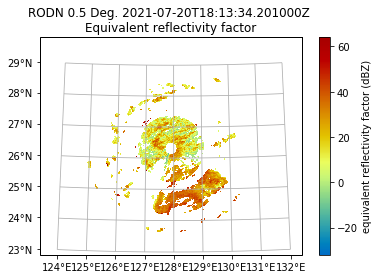

In [19]:
display.plot_ppi_map('reflectivity', 1, vmin=-32, vmax=64, min_lon=minlon, max_lon=maxlon, \
    min_lat=minlat, max_lat=maxlat, \
    lat_lines = local_lats, lon_lines = local_lons, \
    #shapefile=GIS_shapefile, \
    projection=projection, \
    lat_0=radar.latitude['data'][0],lon_0=radar.longitude['data'][0])

